In [9]:
%matplotlib widget
import time
import numpy as np
import matplotlib.pyplot as plt

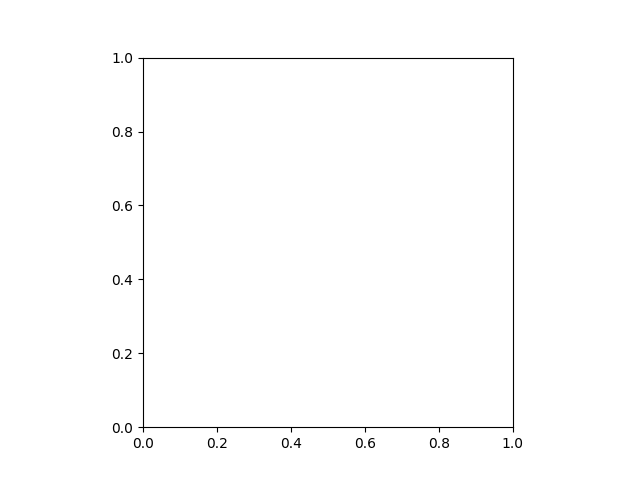

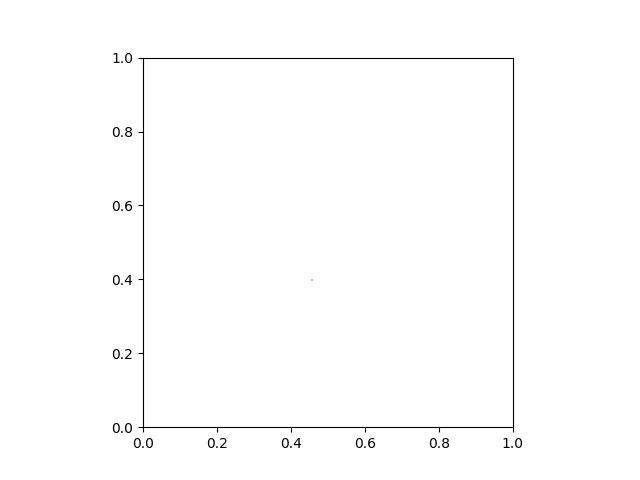

In [18]:
class Callbacks:
    def __init__(self):
        fig, ax = plt.subplots()
        ax.set_aspect(1)
        fig.canvas.mpl_connect("button_press_event", self.press)
        fig.canvas.mpl_connect("button_release_event", self.release)

    def start(self):
        plt.show()

    def press(self, event):
        self.start_time = time.time()

    def release(self, event):
        self.end_time = time.time()
        self.draw_click(event)

    def draw_click(self, event):
        size = 4 * (self.end_time - self.start_time) ** 2
        c1 = plt.Circle([event.xdata, event.ydata], 0.002,)
        c2 = plt.Circle([event.xdata, event.ydata], 0.02 * size, alpha=0.2)
        event.canvas.figure.gca().add_artist(c1)
        event.canvas.figure.gca().add_artist(c2)
        event.canvas.figure.show()


cbs = Callbacks()
cbs.start()

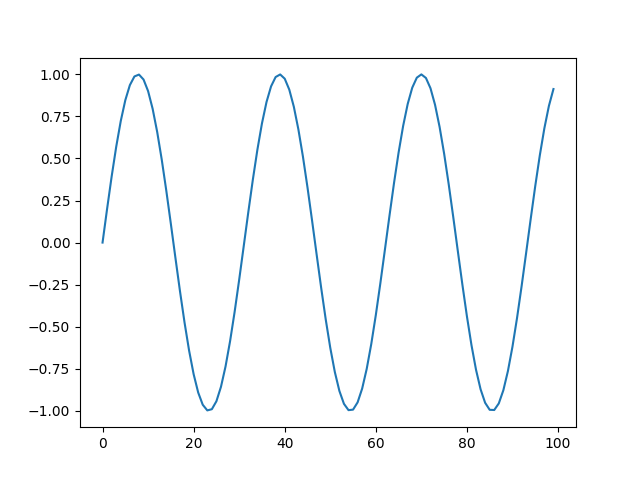

In [12]:
# Testing matplotlib interactions with a simple plot
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)));

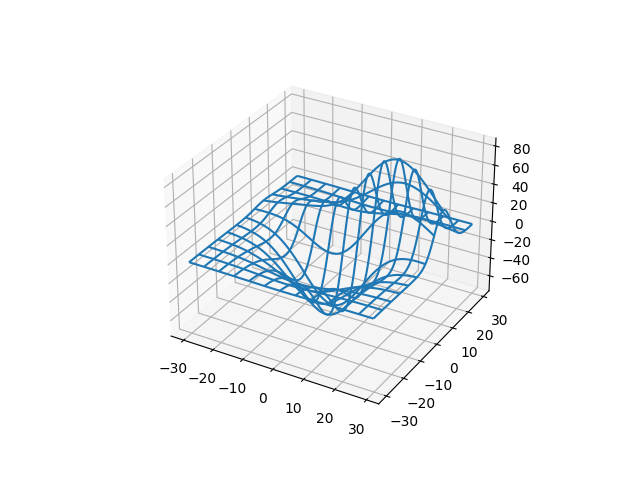

In [13]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

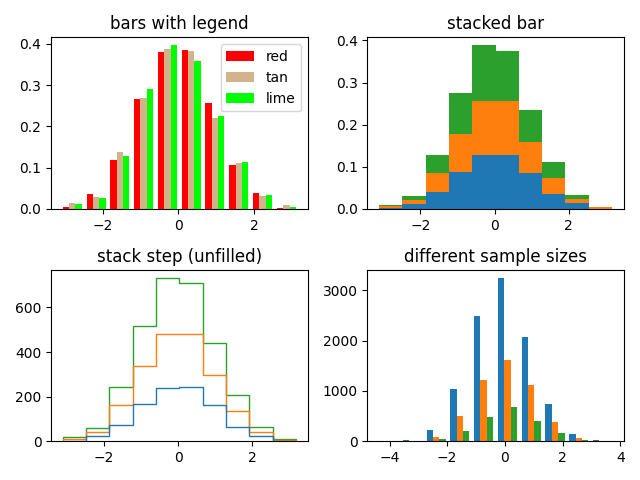

In [14]:
# A more complex example from the matplotlib gallery
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Canvas(layou…

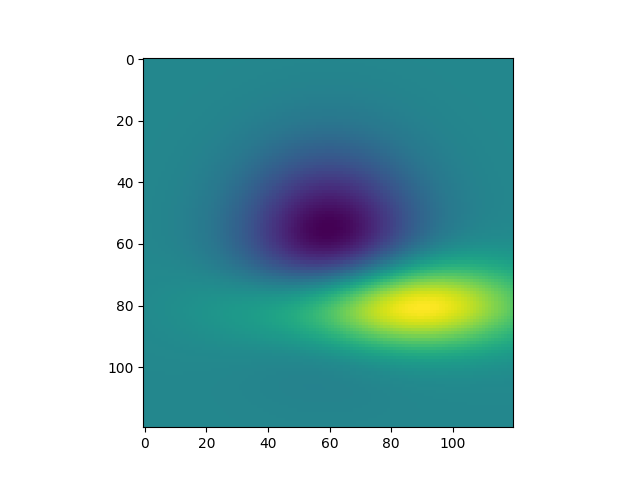

In [15]:
import ipywidgets as widgets

# ensure we are interactive mode 
# this is default but if this notebook is executed out of order it may have been turned off
plt.ion()

fig = plt.figure()
ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=fig.canvas,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

In [19]:
with plt.ioff():
    fig = plt.figure()

ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=fig.canvas,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Canvas(layou…

In [20]:
# precomputing all images
x = np.linspace(0,np.pi,200)
y = np.linspace(0,10,200)
X,Y = np.meshgrid(x,y)
parameter = np.linspace(-5,5)
example_image_stack = np.sin(X)[None,:,:]+np.exp(np.cos(Y[None,:,:]*parameter[:,None,None]))

In [21]:
with plt.ioff():
    fig = plt.figure()
im = plt.imshow(example_image_stack[0])

def update(change):
    im.set_data(example_image_stack[change['new']])
    fig.canvas.draw_idle()
    
    
slider = widgets.IntSlider(value=0, min=0, max=len(parameter)-1)
slider.observe(update, names='value')
widgets.VBox([slider, fig.canvas])

C:\Users\wuihee\AppData\Local\Temp\ipykernel_22892\2898136503.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()
